Точки минимума: 4.249994629179845 -2.199961367390266
Значение функции в этих точках: 1.2975000015213247
Количество итераций: 381


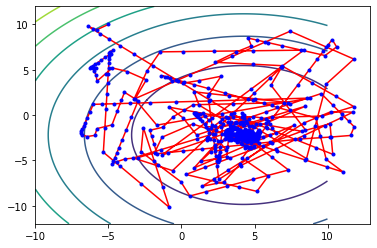

In [2]:
import math as m
import numpy as np
import pylab
import matplotlib.pyplot as plt

fout  = list()

PI = m.pi
rand = np.random.random()* 1000

def Func(x,y):
    return (x*x - 8.5*x + y*y + 4.4*y + 24.2)

def makeData():
    x = np.arange(-10, 10, 0.01)
    y = np.arange(-12, 12, 0.01)
    xgrid, ygrid = np.meshgrid(x, y)
 
    zgrid = xgrid**2 - 8.5*xgrid +ygrid**2 + 4.4*ygrid + 24.2
    
    return xgrid, ygrid, zgrid

def main():
    
    h=1
    eps = 0.000001
    it=0    
    x10=-5.
    x20=10.
    
    fout.append([x10,x20,Func(x10,x20)])
    
    alpha=(PI*(np.random.random()*1000)/180)
    
    x11 = x10+h*m.cos(alpha)
    x21 = x20+h*m.sin(alpha)
    fout.append([x11,x21,Func(x11,x21)])
    while (h>eps):
        it+=1
        while (Func(x11,x21)>=Func(x10,x20)):
            h*=0.7
            alpha=PI*(np.random.random()*1000)/180
            x10=x11
            x20=x21
            x11=x10+h*m.cos(alpha)
            x21=x20+h*m.sin(alpha)
            fout.append([x11,x21,Func(x11,x21)])
        
        while (Func(x11,x21)<Func(x10,x20)):
            h*=1.3
            x10=x11
            x20=x21
            x11=x10+h*m.cos(alpha)
            x21=x20+h*m.sin(alpha)
            fout.append([x11,x21,Func(x11,x21)])
            
    print("Точки минимума:", x11, x21)
    print("Значение функции в этих точках:", Func(x11,x21))
    print("Количество итераций:",it)
    
main()
x, y, z = makeData()
pylab.contour(x, y, z)
data = np.array(fout)
plt.plot(data[:,0], data[:,1], 'r')
plt.plot(data[:,0], data[:,1], 'b.')
pylab.show()

# Метод случайного поиска 
## Пусть стоит задача найти минимум функции двух переменных f(x,у).
1) Задается начальная точка x0, y0;<br><br>
2) Задается начальная длина шага по плоскости h и точность ε;<br><br>
3) С помощью генератора случайных чисел разыгрывается случайное направление на плоскости;<br><br>
4) Делается шаг h в этом направлении и вычисляется функционал в новой точке;<br><br>
5) Если значение функции возросло, то остаемся в начальной точке, шаг немного уменьшается и снова,
разыгрывается случайное направление и проверяется значение функции в новой точке;<br><br>
6) Если значение в новой точке уменьшилось, то шаг немного увеличивается и из новой точки
делается шаг в том же направлении, и т.д. до тех пор, пока в последней точке не будет найдено ни одного направления ведущего к уменьшению функции. При этом длина шага будет все время уменьшаться пока не достигнет ε-окрестности 0.<br><br>
